# Explorando a API COVID19Py

In [2]:
import COVID19Py

In [5]:
covid19 = COVID19Py.COVID19(url = "https://cvtapi.nl", data_source = "jhu")

In [6]:
covid19

In [7]:
latest = covid19.getLatest()
latest

{'confirmed': 24176836, 'deaths': 825696, 'recovered': 3951322}

## Obtendo o dados de um pais especifico

In [8]:
pais = covid19.getLocationByCountryCode("US", timelines=True)

In [6]:
#pais

In [7]:
#pais[0]['timelines']

In [8]:
#pais[0]['timelines']

In [9]:
#pais[0]['timelines']['confirmed']['timeline']

# Gerando a dataFrame com os dados obtidos

In [14]:
import pandas as pd
from datetime import date,  datetime

## Casos comfirmados

In [15]:
def tranforma_data(date_str):
    dt = datetime.strptime(date_str, '%Y-%m-%dT%H:%M:%SZ')
    data_nova = date(dt.year, dt.month, dt.day).strftime("%d/%m/%Y") 
    return data_nova

In [16]:
casos_confirmados = pd.DataFrame(data = pais[0]['timelines']['confirmed'])
# removendo coluna latest
del casos_confirmados['latest']

# tranformado o index em coluna 
casos_confirmados['Data'] = casos_confirmados.index
#casos_confirmados.index = range(casos_confirmados.shape[0])

# renomeando as colunas
casos_confirmados.columns = ['Casos', 'Data']

# modifica o formato da data
casos_confirmados['Data'] = casos_confirmados['Data'].apply(tranforma_data)

#casos_confirmados.reset_index(level=0, inplace=True)

# selecioando apenas com os com valores acima de 100 casos comfimados
selecao = casos_confirmados.Casos > 200
casos_confirmados = casos_confirmados[selecao]

# reiniciando o index
casos_confirmados.index = range(casos_confirmados.shape[0])

casos_confirmados.head()

,Casos,Data
0,222,06/03/2020
1,337,07/03/2020
2,451,08/03/2020
3,519,09/03/2020
4,711,10/03/2020


## Mortes comfirmadas

In [17]:
mortes_confirmados = pd.DataFrame(data = pais[0]['timelines']['deaths'])
# removendo coluna latest
del mortes_confirmados['latest']

# tranformado o index em coluna e reiniciando o index
mortes_confirmados['Data'] = mortes_confirmados.index

# renomeando as colunas
mortes_confirmados.columns = ['Mortes', 'Data']

# modifica o formato da data
mortes_confirmados['Data'] = mortes_confirmados['Data'].apply(tranforma_data)

# selecionando apenas com os com valores acima de 100 casos comfimados
mortes_confirmados = mortes_confirmados[selecao]

# reiniciando o index
mortes_confirmados.index = range(mortes_confirmados.shape[0])

mortes_confirmados.head()

,Mortes,Data
0,14,06/03/2020
1,17,07/03/2020
2,21,08/03/2020
3,22,09/03/2020
4,28,10/03/2020


In [18]:
casos_e_mortes_confirmados = pd.DataFrame([casos_confirmados.Data,
                                           casos_confirmados.Casos, 
                                           mortes_confirmados.Mortes]).transpose()
casos_e_mortes_confirmados['Dias'] = casos_e_mortes_confirmados.index
casos_e_mortes_confirmados.head()

,Data,Casos,Mortes,Dias
0,06/03/2020,222,14,0
1,07/03/2020,337,17,1
2,08/03/2020,451,21,2
3,09/03/2020,519,22,3
4,10/03/2020,711,28,4


# Media movel de 3

In [19]:
casos_e_mortes_confirmados['Casos_Media_3'] = casos_e_mortes_confirmados['Casos'].rolling(3, min_periods=1).mean()
casos_e_mortes_confirmados['Mortes_Media_3'] = casos_e_mortes_confirmados['Mortes'].rolling(3, min_periods=1).mean()

In [20]:
casos_e_mortes_confirmados.head()

,Data,Casos,Mortes,Dias,Casos_Media_3,Mortes_Media_3
0,06/03/2020,222,14,0,222.000000,14.000000
1,07/03/2020,337,17,1,279.500000,15.500000
2,08/03/2020,451,21,2,336.666667,17.333333
3,09/03/2020,519,22,3,435.666667,20.000000
4,10/03/2020,711,28,4,560.333333,23.666667


In [21]:
casos_e_mortes_confirmados['Taxa_Casos_Media_3'] = None
casos_e_mortes_confirmados['Taxa_Mortes_Media_3'] = None

In [22]:
for i in range(len(casos_e_mortes_confirmados) - 1):
    dx = casos_e_mortes_confirmados.loc[i+1,'Casos_Media_3'] - casos_e_mortes_confirmados.loc[i, 'Casos_Media_3']
    casos_e_mortes_confirmados.loc[i,'Taxa_Casos_Media_3'] = dx
    
    dx = casos_e_mortes_confirmados.loc[i+1, 'Mortes_Media_3'] - casos_e_mortes_confirmados.loc[i, 'Mortes_Media_3']
    casos_e_mortes_confirmados.loc[i,'Taxa_Mortes_Media_3'] = dx

In [23]:
casos_e_mortes_confirmados.head()

,Data,Casos,Mortes,Dias,Casos_Media_3,Mortes_Media_3,Taxa_Casos_Media_3,Taxa_Mortes_Media_3
0,06/03/2020,222,14,0,222.000000,14.000000,57.5,1.5
1,07/03/2020,337,17,1,279.500000,15.500000,57.1667,1.83333
2,08/03/2020,451,21,2,336.666667,17.333333,99,2.66667
3,09/03/2020,519,22,3,435.666667,20.000000,124.667,3.66667
4,10/03/2020,711,28,4,560.333333,23.666667,219.333,4


In [24]:
casos_e_mortes_confirmados.tail()

,Data,Casos,Mortes,Dias,Casos_Media_3,Mortes_Media_3,Taxa_Casos_Media_3,Taxa_Mortes_Media_3
169,22/08/2020,5667070,176350,169,5.621129e+06,175324.000000,42599.3,848.333
170,23/08/2020,5701645,176800,170,5.663728e+06,176172.333333,39022,626
171,24/08/2020,5739536,177245,171,5.702750e+06,176798.333333,36880,712
172,25/08/2020,5777710,178486,172,5.739630e+06,177510.333333,40058,969.333
173,26/08/2020,5821819,179708,173,5.779688e+06,178479.666667,None,None


# Plotando Gráficos

## Gráficos - Casos totais

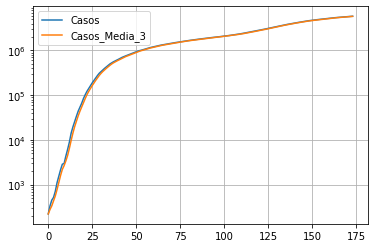

In [25]:
ax = casos_e_mortes_confirmados.plot(grid = True, y = ['Casos','Casos_Media_3' ], logy = True)
ax

## Gráficos - Mortes totais

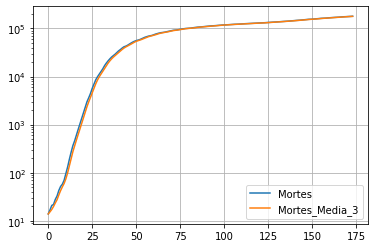

In [26]:
ax = casos_e_mortes_confirmados.plot(grid = True, y = ['Mortes', 'Mortes_Media_3'], logy = True)
ax

## Gráficos - Taxa de casos

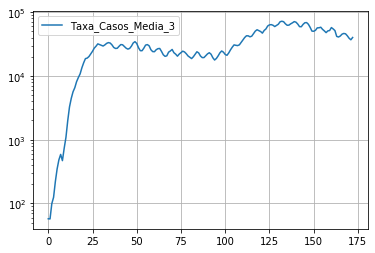

In [27]:
ax = casos_e_mortes_confirmados.plot(grid = True, y = 'Taxa_Casos_Media_3', logy = True)
ax

## Verificando todos os paises diponíveis

In [28]:
all_data = covid19.getAll()
all_data['locations']
df = pd.DataFrame(all_data['locations'])

In [29]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

### Obtendo o codigos

In [9]:
df[ df.country == 'Brazil']

NameError: name 'df' is not defined

In [ ]:
df[ df.country == 'Spain']

In [ ]:
df[ df.country == 'Italy']

In [ ]:
df[ df.country == 'Germany']

In [ ]:
df[ df.country == 'US']

In [ ]:
df[df.country == 'Turkey']

In [ ]:
df[df.country == 'South Africa']

In [ ]:
df[df.country == 'Korea, South']

In [30]:
df[df.country == 'India']

,id,country,country_code,country_population,province,last_updated,coordinates,latest
143,143,India,IN,1.359772e+09,,2020-08-27T17:33:04.576756Z,"{'latitude': '20.593684', 'longitude': '78.962...","{'confirmed': 3310234, 'deaths': 60472, 'recov..."
